# Entregável 1 - visão computacional

In [7]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.11 


# Equalização de histograma

In [8]:
rintin = cv2.imread("RinTinTin.jpg")

In [9]:
rintin.shape

(240L, 320L, 3L)

In [10]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [11]:
rintin_gray.shape

(240L, 320L)

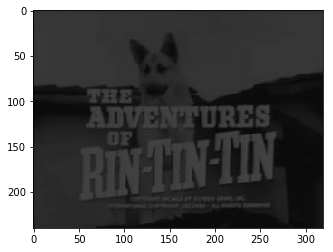

In [12]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

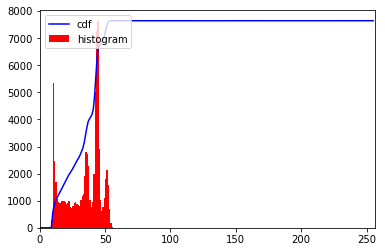

In [13]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

1. Não, pois a imagem é escura e todas as cores são de frequencia bem baixa, entre 0 e 50


In [14]:
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        rintin_gray[i][j]=-5*(8-(rintin_gray[i][j]))
        

2 - Acima temos o código que faz a equalização da imagem. Poderiamos ter usado o comando equalize(), mas por ser uma primeira vez, fizemos manualmente.

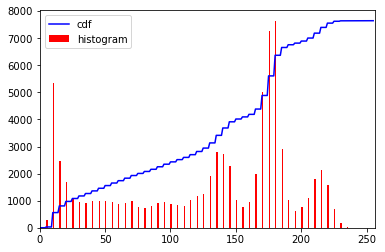

In [15]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

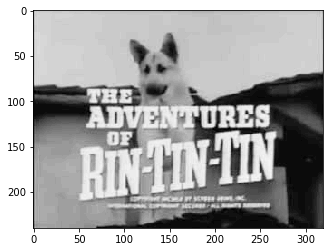

In [16]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [17]:
box = cv2.imread("hall_box_battery1.jpg")

In [18]:
box_rgb = cv2.cvtColor(box, cv2.COLOR_BGR2RGB)

In [19]:
box_r = box_rgb[:,:,0]
box_b = box_rgb[:,:,2]

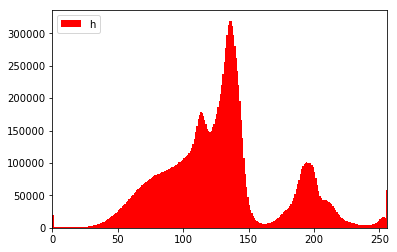

In [20]:
hist,bins = np.histogram(box_r.flatten(),256,[0,256])

plt.hist(box_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('histograma'), loc = 'upper left')
plt.show()

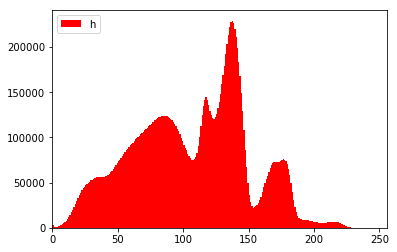

In [21]:
hist,bins = np.histogram(box_b.flatten(),256,[0,256])

plt.hist(box_b.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('histograma'), loc = 'upper left')
plt.show()

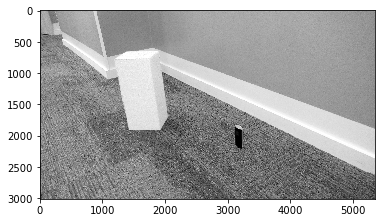

In [22]:
plt.imshow(box_r, cmap='Greys_r')

### O que esses histogramas significam?
#### Bom, visto que separamos os canais R e B da imagem, teremos duas fotos, uma com a caixa vermelha sendo branca, e outra com a bateria azul sendo branca. Qual das duas imagens tem MAIS branco? A da caixa vermelha grande ou a da bateria azul pequenininha?
#### Chegamos na conclusão que a imagem da caixa vermelha, ao passar pelo filtro, terá mais branco que a azul ao passar pelo filtro. Dessa forma, quando plotarmos os histogramas em gray scale, o histograma da caixa vermelha vai estar tendendo mais para a direita que o da bateria, que vai estar tendendo mais para a esquerda.

#### De fato isso ocorre, e assim podemos reconhecer a caixa azul da vermelha através da leitura que o próprio python nos forneceu!